In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from scipy.special import boxcox, inv_boxcox
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor

In [3]:
import seaborn as sn
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = "25,10"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["axes.labelsize"] = 16

In [4]:
import os
os.chdir("C:/Users/fahad/OneDrive/Desktop/UT ARLINGTON/3rd SEM - SUMMER/DATA SCIENCEPROG APPROACH/Assignments/ML Homework/Regression/")

In [5]:
housing = pd.read_excel('ca_housing.xlsx')

# Basic Data Analysis or Exploratory Data Analysis

In [6]:
print(housing.shape)
print(housing.info())
housing.head()

(20640, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
None


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
print("The number of rows and colums are {} and also called shape of the matrix".format(housing.shape))
print("Columns names are \n {}".format(housing.columns))

The number of rows and colums are (20640, 10) and also called shape of the matrix
Columns names are 
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [10]:
print(housing.dtypes)

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object


<Figure size 1800x720 with 0 Axes>

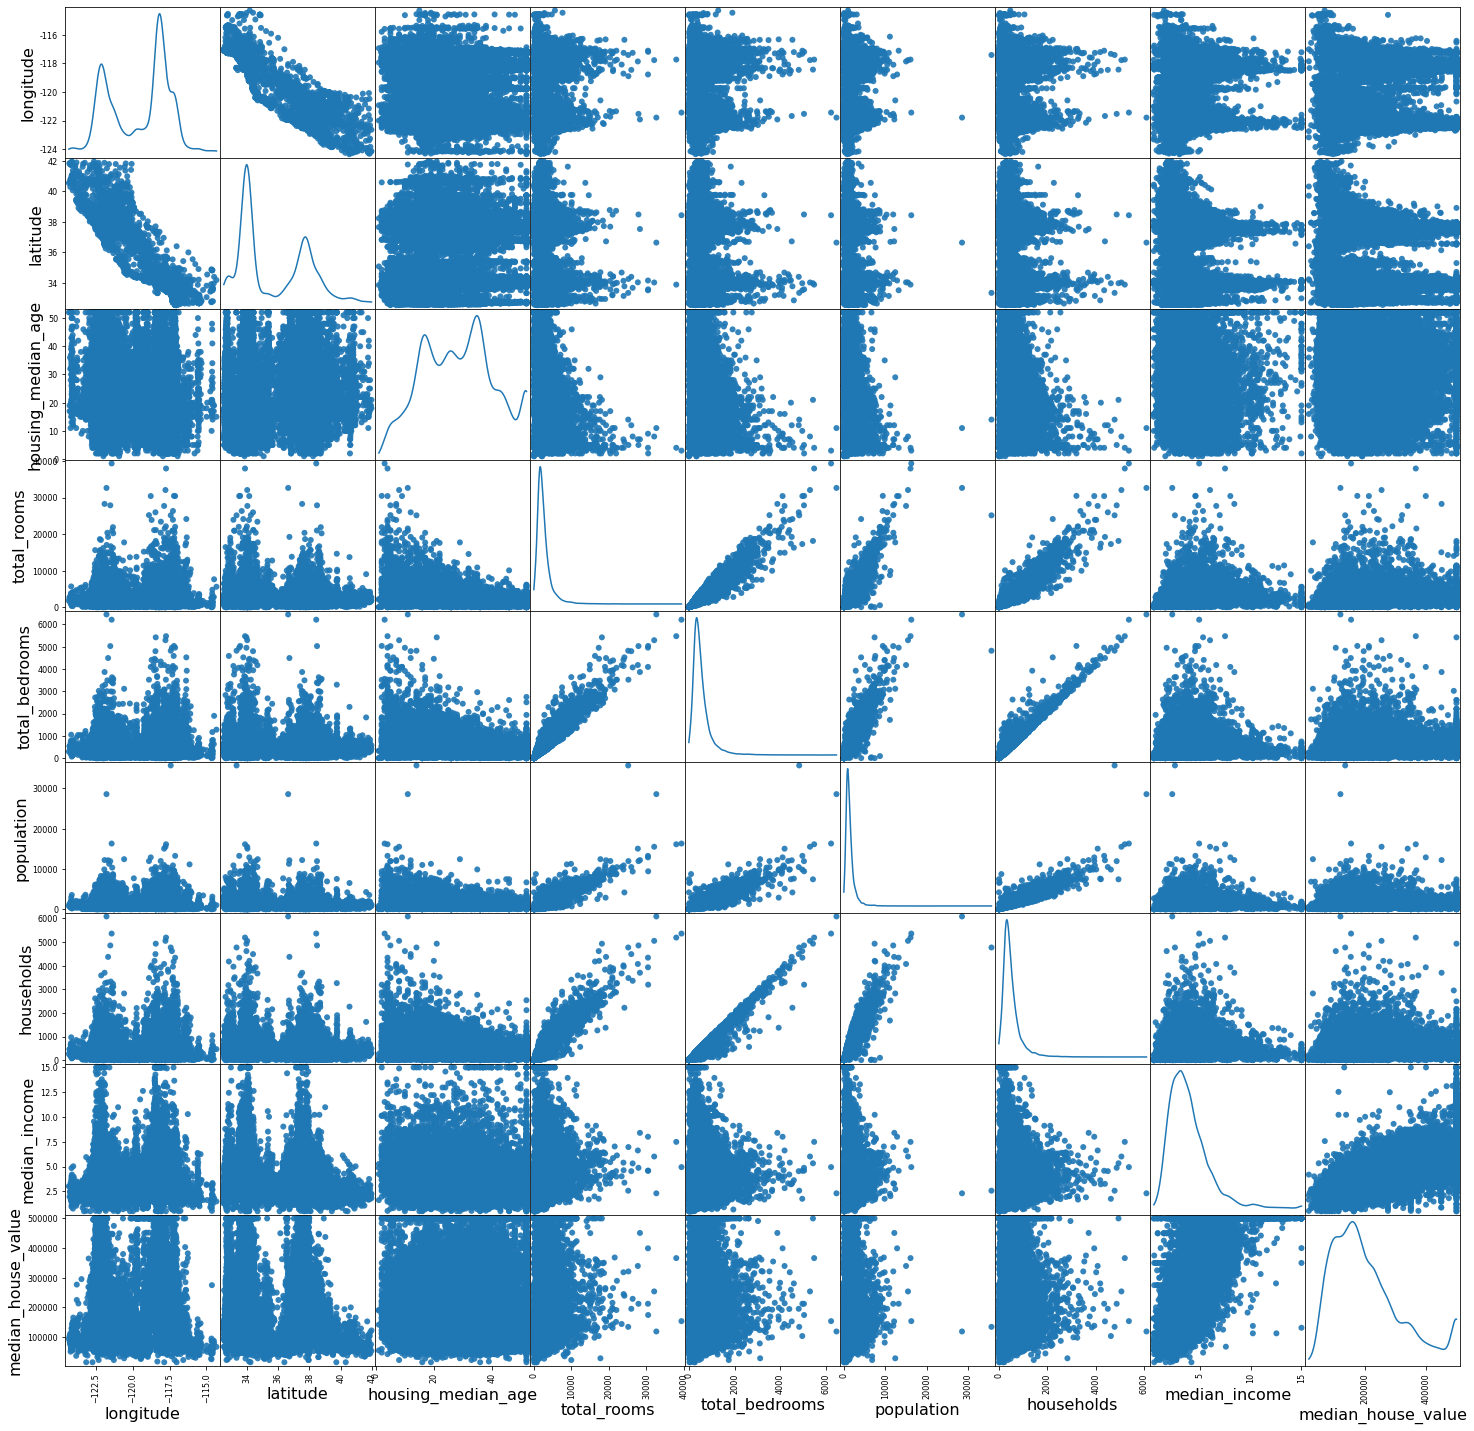

In [11]:
#display scatter_matrix also
from pandas.plotting import scatter_matrix
fig = plt.figure()
scatter_matrix(housing,figsize =(25,25),alpha=0.9,diagonal="kde",marker="o");

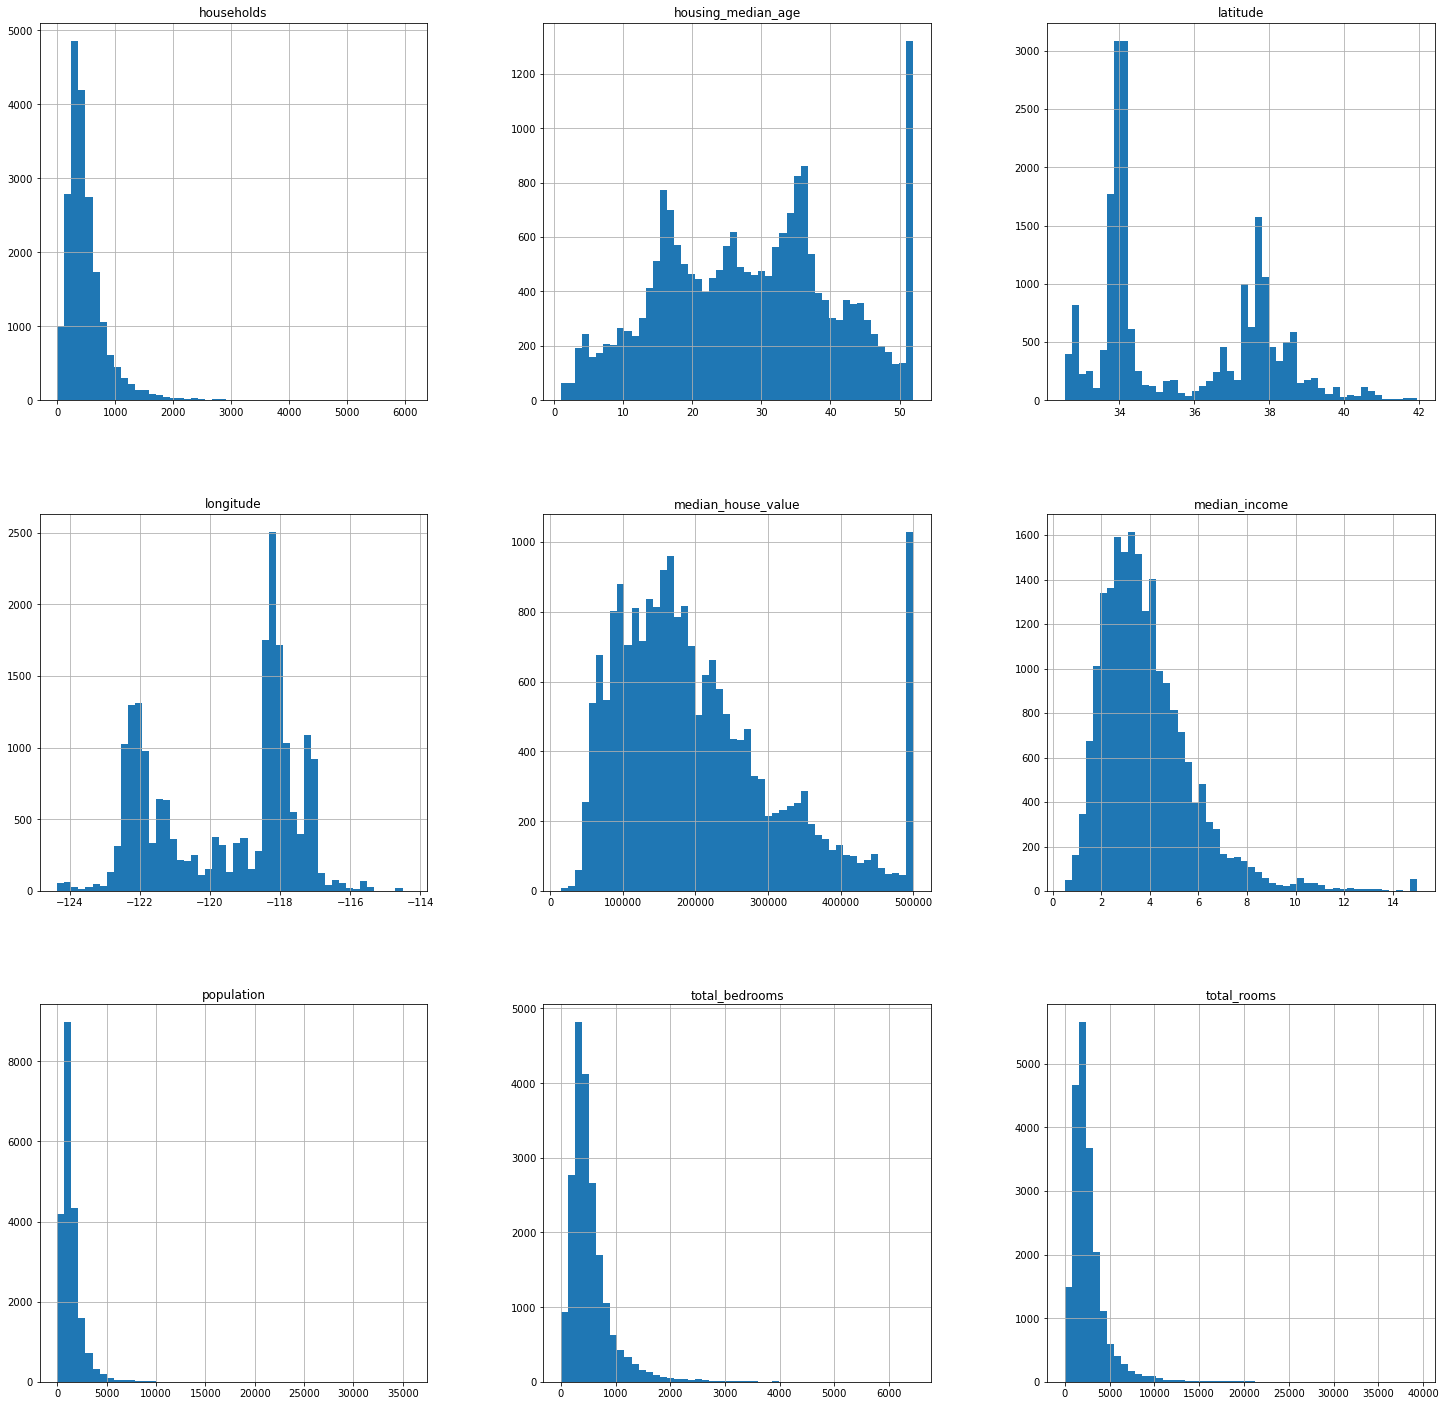

In [12]:
housing.hist(figsize=(25,25),bins=50);

In [13]:
hcorr = housing.corr()
hcorr.style.background_gradient()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [14]:
from sklearn.impute import SimpleImputer
imputer=KNNImputer(n_neighbors=5)
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
X = imputer.transform(housing_num)
housing_filled = pd.DataFrame(X, columns=housing_num.columns)

In [15]:
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
X, y = housing_filled.drop(['median_house_value'], axis=1), housing_filled['median_house_value']
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns.tolist())

X_scaled = X_scaled.join(housing['ocean_proximity'])
data_scaled = X_scaled.join(housing_filled['median_house_value'])

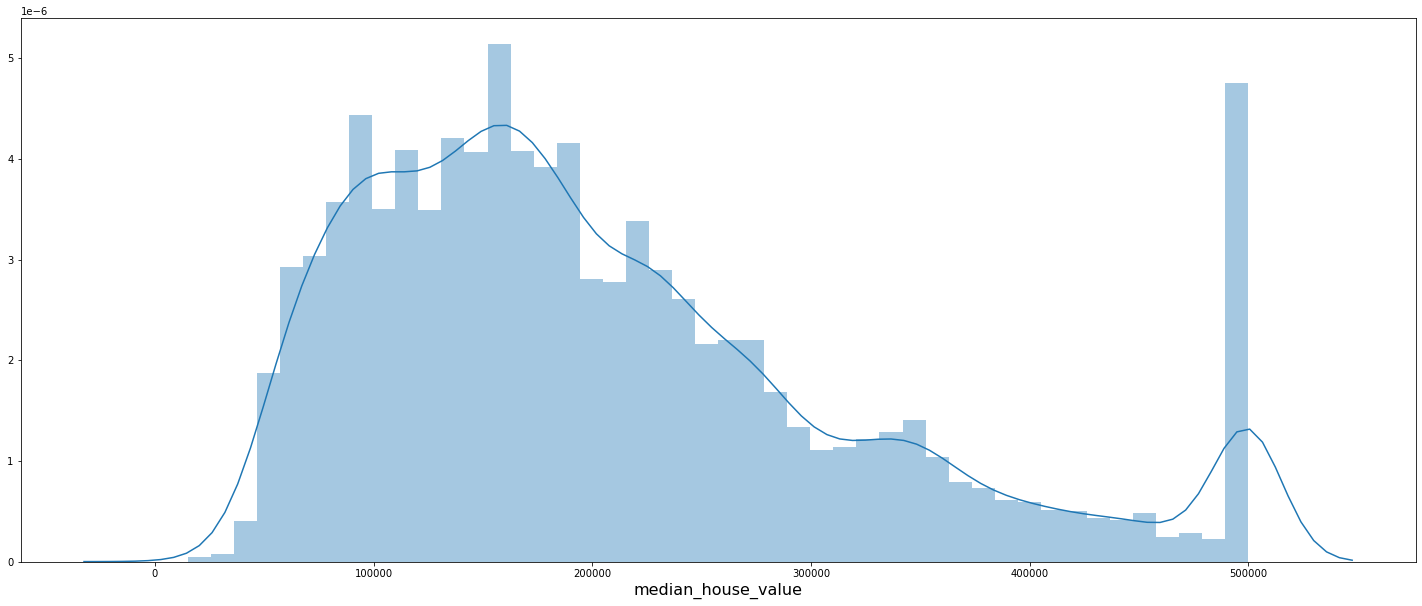

In [16]:
hist, ax = plt.subplots()
ax = sns.distplot(y)

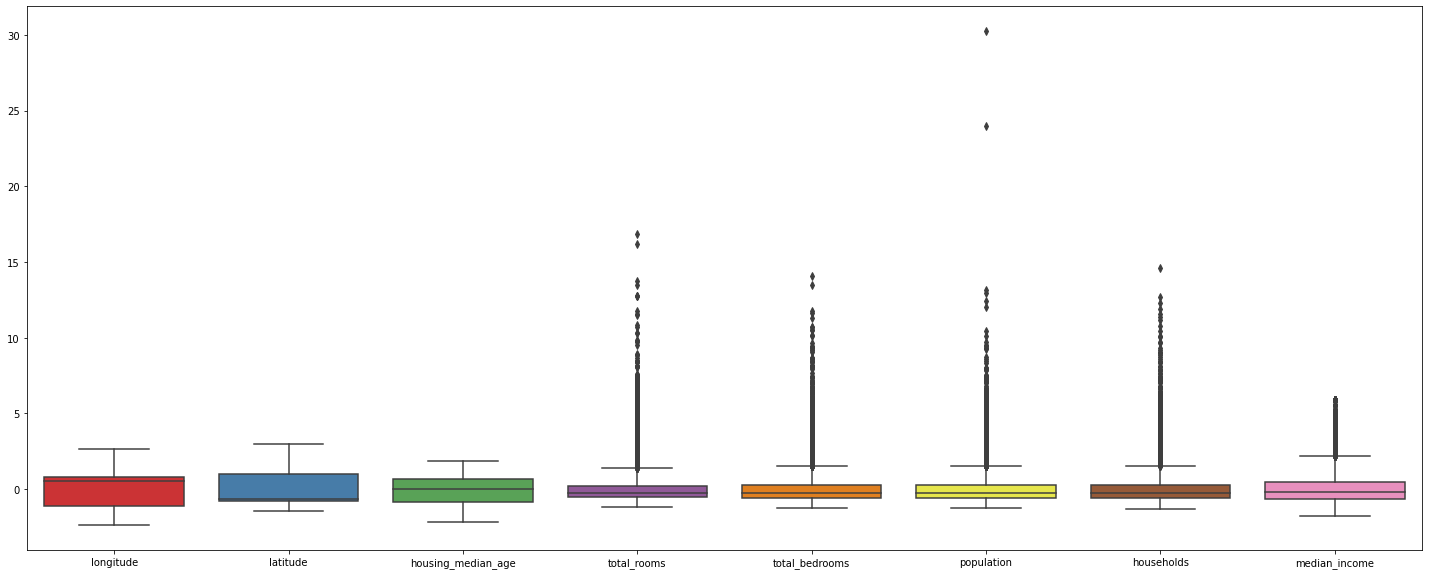

In [17]:
hist, ax = plt.subplots()
plt.rcParams["figure.figsize"] = "45,15"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["axes.labelsize"] = 16
ax = sns.boxplot(data=X_scaled, palette='Set1')

In [18]:
#creating dummies for categorical columns
X = pd.get_dummies(X_scaled, drop_first= True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

# XGBoost Regressor

In [19]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.02)
param_dist = {'n_estimators': [1000,1500],
              'learning_rate': [0.01,0.005],
              'max_depth': [1,2,3,4]
             }
xgb_cv = RandomizedSearchCV(xgb, param_distributions=param_dist, cv=10)

xgb.fit(X_train, y_train)
y_pred_xg = xgb.predict(X_test)
print(f'R-squared of the model is: {xgb.score(X_test, y_test)}')
print(f'Mean squared error of the model is: {mean_squared_error(y_test,y_pred_xg)}')

R-squared of the model is: 0.8348807574813017
Mean squared error of the model is: 2098233444.5005379


In [20]:
y_pred_xg = xgb.predict(X_test)
print(len(y_pred_xg))
print(len(y_pred_xg))
print(y_pred_xg[0:5])
print(y_pred_xg[0:5])

5160
5160
[125716.02 271433.16  59089.7  203702.06 134757.48]
[125716.02 271433.16  59089.7  203702.06 134757.48]


Text(0, 0.5, ' Predicted median_house_value')

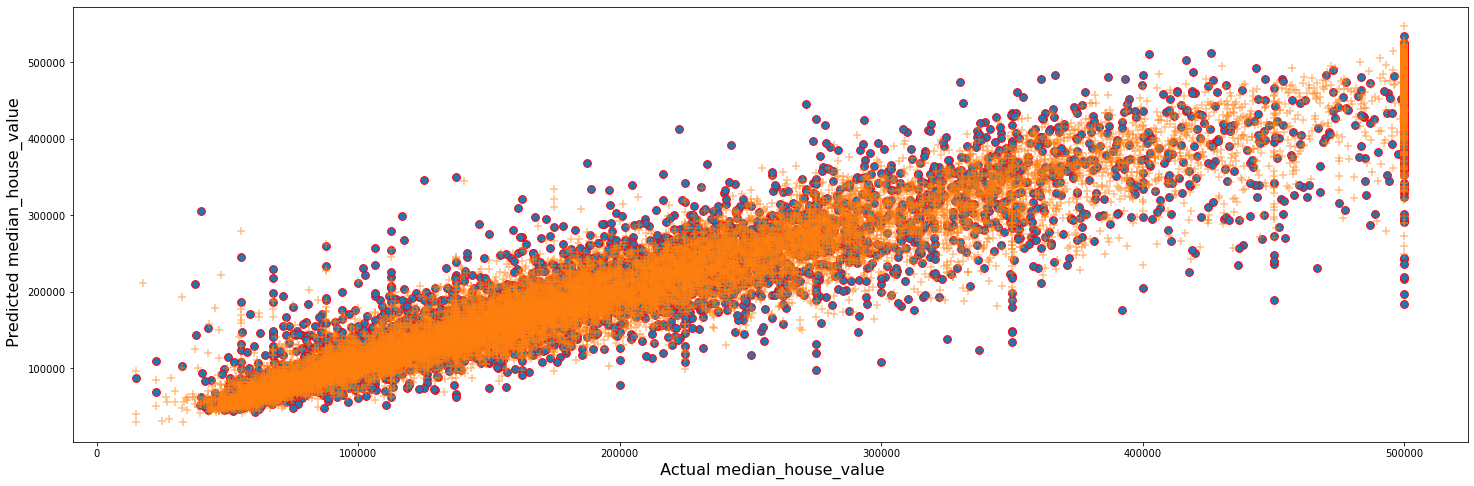

In [21]:
fig = plt.figure(figsize=(25,8))
plt.scatter(y_test,y_pred_xg,marker="o",edgecolors ="r",s=60)
plt.scatter(y_train,xgb.predict(X_train),marker="+",s=50,alpha=0.5)
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")

# Random Forest Regressor

In [22]:
#Using Random forest regressor
random_forest = RandomForestRegressor(random_state=22)

#Performing a randomized search for finding best parameters
param_dist = {'n_estimators': range(500,1500,500),
              'max_depth': range(1,4,1),
              'max_features': range(1,4,1),
              'min_samples_split': range(500,2000,500)
             }
random_forest_cv = RandomizedSearchCV(random_forest, param_distributions=param_dist, cv=10, scoring='explained_variance')

random_forest.fit(X_train, y_train)
random_forest
y_pred_rf = random_forest.predict(X_test)
print("R-squared of the model is: ",random_forest.score(X_test, y_test))
print(f'Mean squared error of the model is: {mean_squared_error(y_test,y_pred_rf)}')

R-squared of the model is:  0.8233235632922329
Mean squared error of the model is: 2245095136.7066746


In [23]:
y_pred_rf = random_forest.predict(X_test)
print(len(y_pred_rf))
print(len(y_pred_rf))
print(y_pred_rf[0:5])
print(y_pred_rf[0:5])

5160
5160
[118314. 232100.  56960. 197800. 124126.]
[118314. 232100.  56960. 197800. 124126.]


Text(0, 0.5, ' Predicted median_house_value')

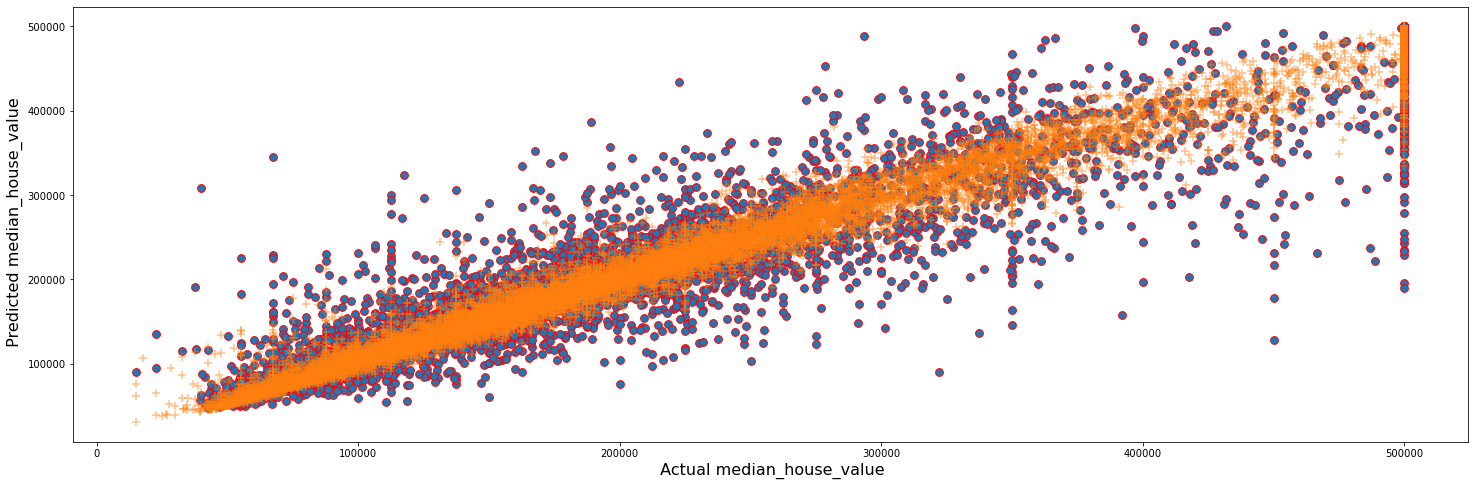

In [24]:
fig = plt.figure(figsize=(25,8))
plt.scatter(y_test,y_pred_rf,marker="o",edgecolors ="r",s=60)
plt.scatter(y_train,random_forest.predict(X_train),marker="+",s=50,alpha=0.5)
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")

# Linear Regression

In [25]:
#Fit model and predict
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_lin = model.predict(X_test)

#Look at the results
values = np.append(model.intercept_, model.coef_)
names = np.append('Intercept', X.columns)
results = pd.DataFrame(values, index=names, columns=['Coef'])
#print(results)
print(f'R-Squared of the model is {model.score(X_test, y_test)}')
print(f'Mean squared error of the model is {mean_squared_error(y_test, y_pred_lin)}')

R-Squared of the model is 0.6535660340850546
Mean squared error of the model is 4402269066.316623


In [26]:
y_pred_lin = model.predict(X_test)
print(len(y_pred_lin))
print(len(y_pred_lin))
print(y_pred_lin[0:5])
print(y_pred_lin[0:5])

5160
5160
[121407.25799651 240557.33373969  65278.30649082 159086.94063079
 154371.68621743]
[121407.25799651 240557.33373969  65278.30649082 159086.94063079
 154371.68621743]


Text(0, 0.5, ' Predicted median_house_value')

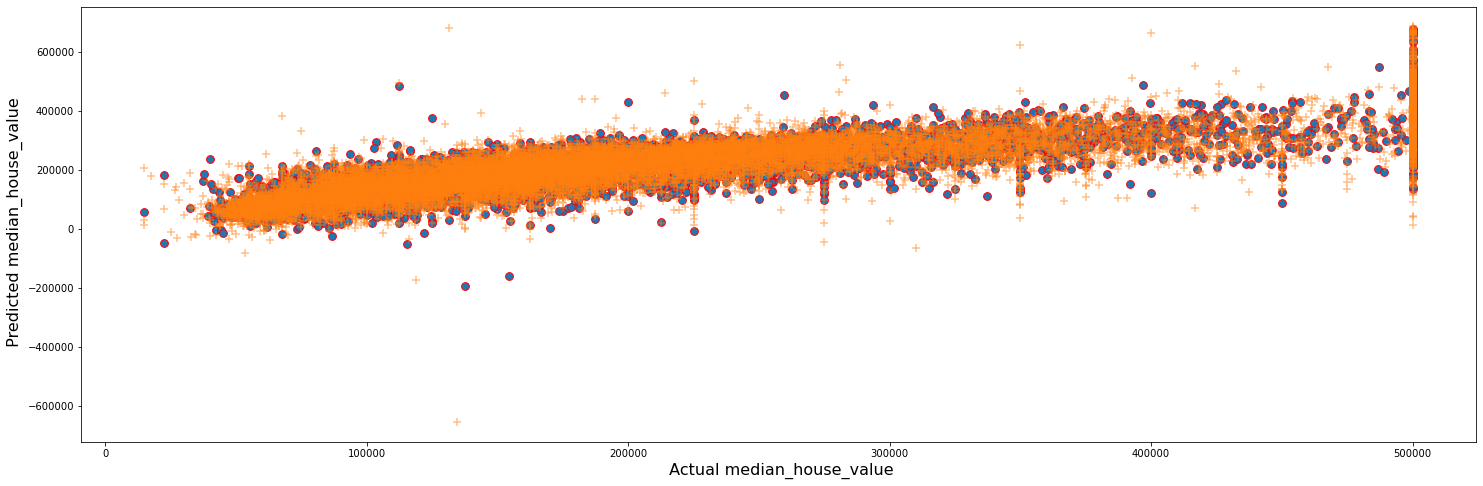

In [27]:
fig = plt.figure(figsize=(25,8))
plt.scatter(y_test,y_pred_lin,marker="o",edgecolors ="r",s=60)
plt.scatter(y_train,model.predict(X_train),marker="+",s=50,alpha=0.5)
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")

# Gradient Boosting

In [28]:
# Using gradient boosting
gboost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.02, max_depth=3, max_features=3)

param_dist = {'n_estimators': [1000,1500],
              'learning_rate': [0.01,0.005],
              'max_depth': [1,2,3,4],
              'max_features': [3,4]
             }

gboost_cv = RandomizedSearchCV(gboost, param_distributions=param_dist, cv=10)

from sklearn.metrics import r2_score
gboost.fit(X_train, y_train)
y_pred_gb = gboost.predict(X_test)
print(f'R-squared of the model is: {gboost.score(X_test, y_test)}')
print(f'Mean squared error of the model is: {mean_squared_error(y_test,y_pred_gb)}')

R-squared of the model is: 0.7858851592586317
Mean squared error of the model is: 2720839273.209302


In [29]:
y_pred_gb = gboost.predict(X_test)
print(len(y_pred_gb))
print(len(y_pred_gb))
print(y_pred_gb[0:5])
print(y_pred_gb[0:5])

5160
5160
[121620.50035422 250970.06729984  57315.85848418 212041.58397336
 137472.3146504 ]
[121620.50035422 250970.06729984  57315.85848418 212041.58397336
 137472.3146504 ]


Text(0, 0.5, ' Predicted median_house_value')

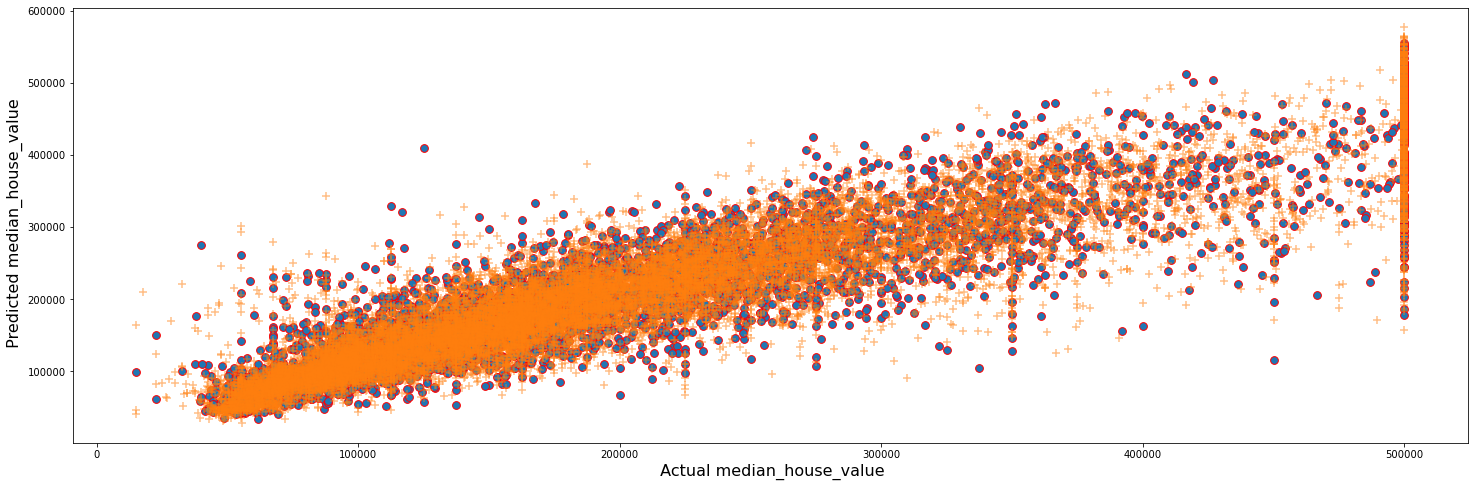

In [30]:
fig = plt.figure(figsize=(25,8))
plt.scatter(y_test,y_pred_gb,marker="o",edgecolors ="r",s=60)
plt.scatter(y_train,gboost.predict(X_train),marker="+",s=50,alpha=0.5)
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")